In [1]:
from CPT.CPT import *
# import bokeh.palettes as palettes
#from bokeh.plotting import figure, show
#from bokeh.io import output_notebook
#output_notebook()

In [ ]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[576697, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])


In [ ]:
layout.add_measurements(measurements = points, points_type = 'initial')



In [ ]:
layout.optimize_measurements()

In [ ]:
layout.generate_combined_layer(points_type = 'initial')

layout.add_lidars(lidar_pos_1 = np.array([580800 - 1800,4845300 + 2500, 271]))
layout.generate_second_lidar_layer()
layout.add_lidars(lidar_pos_2 = np.array([579400 + 1200,4847700 - 2000,100]))
layout.generate_campaign_layout()

layout.plot_layer(layout.second_lidar_layer)
layout.measurements_reachable
layout.optimize_trajectory()
layout.plot_layout(save_plot = True)

In [ ]:
layer = np.sum(layout.range_layer,axis = 2)
levels = np.linspace(np.min(layer), np.max(layer), 13)

In [ ]:
fig, ax = plt.subplots(sharey = True, figsize=(800/layout.MY_DPI, 800/layout.MY_DPI), dpi=layout.MY_DPI)
cmap = plt.cm.RdBu_r
cs = plt.pcolormesh(layout.x, layout.y, layer, cmap=cmap, alpha = 1)

ax.set_aspect(1.0)
ax.set_axis_off()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


plt.show()
fig.savefig('/Users/niva/Desktop/test_viz/plot.png', bbox_inches='tight',transparent=True,pad_inches=0)

In [ ]:
fig = plt.figure(figsize=(1.0, 4.0), facecolor=None, frameon=False)
ax = fig.add_axes([0.0, 0.05, 0.2, 0.9])
cb = fig.colorbar(cs, cax=ax)
cb.set_label('Number of visible points', rotation=-90, color='k', labelpad=20)

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Adding initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Generating combined layer for initial measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


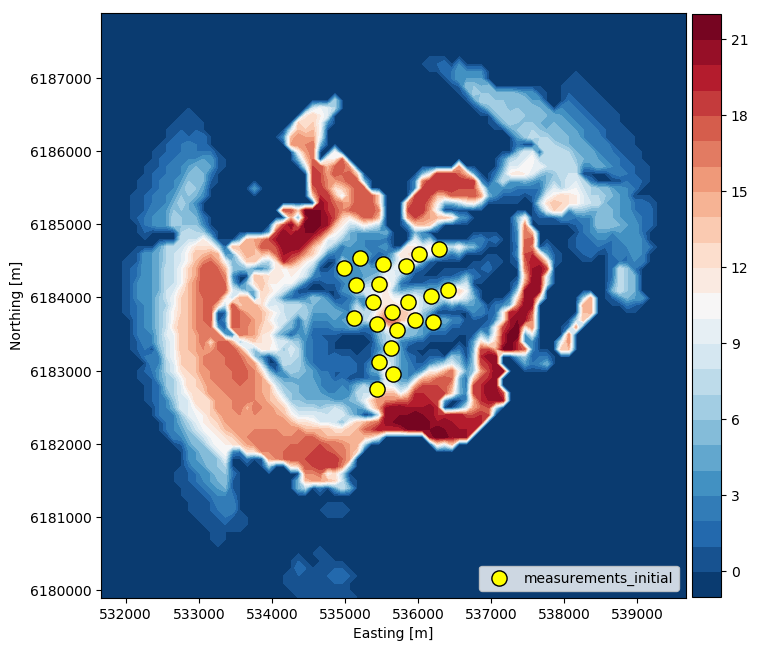

In [2]:
# Ireland
layout = CPT()
layout.MESH_RES = 100
layout.REP_RADIUS = 250
layout.MESH_EXTENT = 4000
layout.AVERAGE_RANGE = 3000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('30U')
layout.MAX_ELEVATION_ANGLE = 5
points = np.array(
[
[534989 ,6184410 ,47],
[535205 ,6184536 ,47],
[535523 ,6184458 ,47],
[535837 ,6184425 ,47],
[536008 ,6184602 ,47],
[536288 ,6184670 ,47],
[535150 ,6184166 ,47],
[535468 ,6184187 ,47],
[535119 ,6183722 ,47],
[535382 ,6183935 ,47],
[535646 ,6183803 ,47],
[535865 ,6183938 ,47],
[536172 ,6184027 ,47],
[536404 ,6184103 ,47],
[535465 ,6183116 ,47],
[535432 ,6183632 ,47],
[535707 ,6183551 ,47],
[535958 ,6183688 ,47],
[536209 ,6183662 ,47],
[535636 ,6183310 ,47],
[535661 ,6182950 ,47],
[535440 ,6182744 ,47]
]

)
layout.add_measurements(measurements = points, points_type = 'initial')
layout.measurements_initial[:,2] = layout.measurements_initial[:,2] + layout.get_elevation('30U',layout.measurements_initial)
# layout.optimize_measurements()
layout.generate_combined_layer(points_type = 'initial')

layout.plot_layer(layout.combined_layer)




Lidar 1 position added!


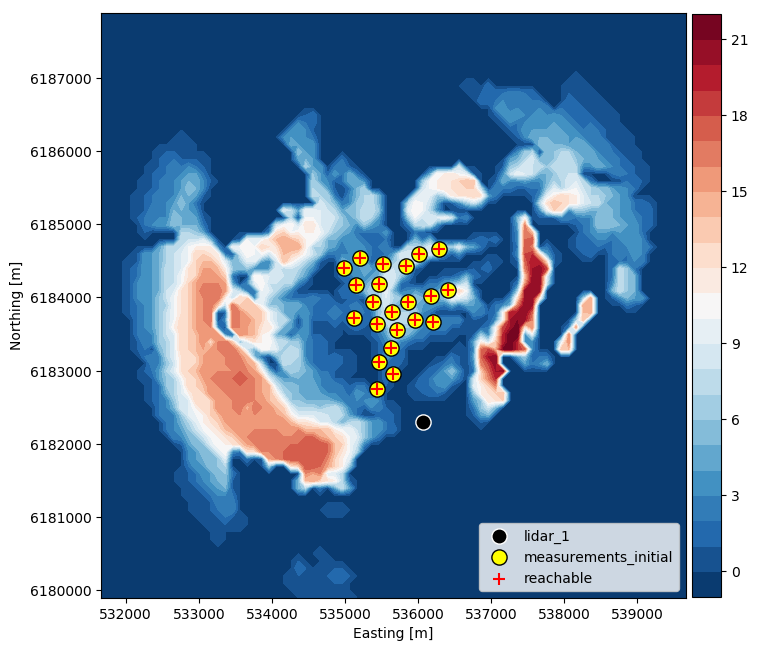

In [3]:

layout.add_lidars(lidar_pos_1 = np.array([536062, 6182292, 350]))
layout.generate_second_lidar_layer()
layout.plot_layer(layout.second_lidar_layer)


Lidar 2 position added!


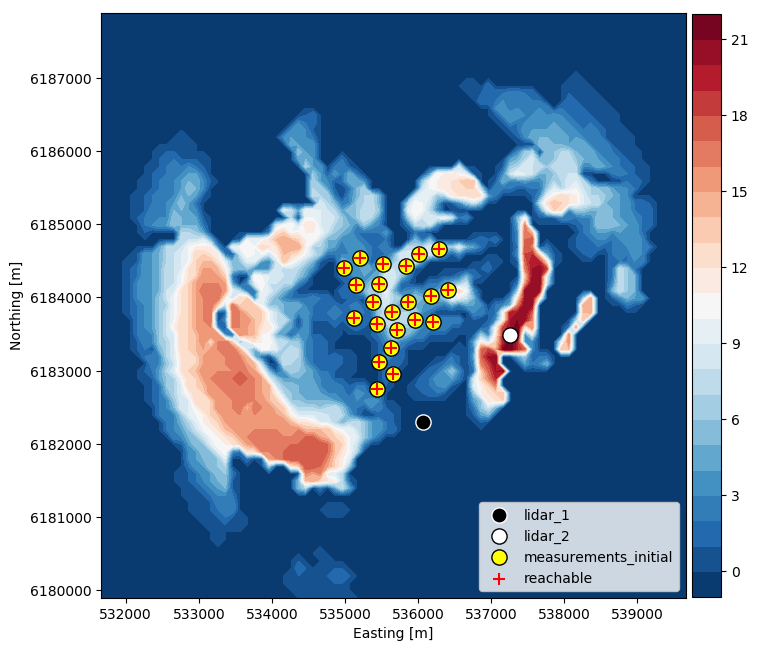

In [4]:
layout.add_lidars(lidar_pos_2 = np.array([537262, 6183492, 304]))
layout.generate_campaign_layout()
layout.plot_layer(layout.second_lidar_layer)





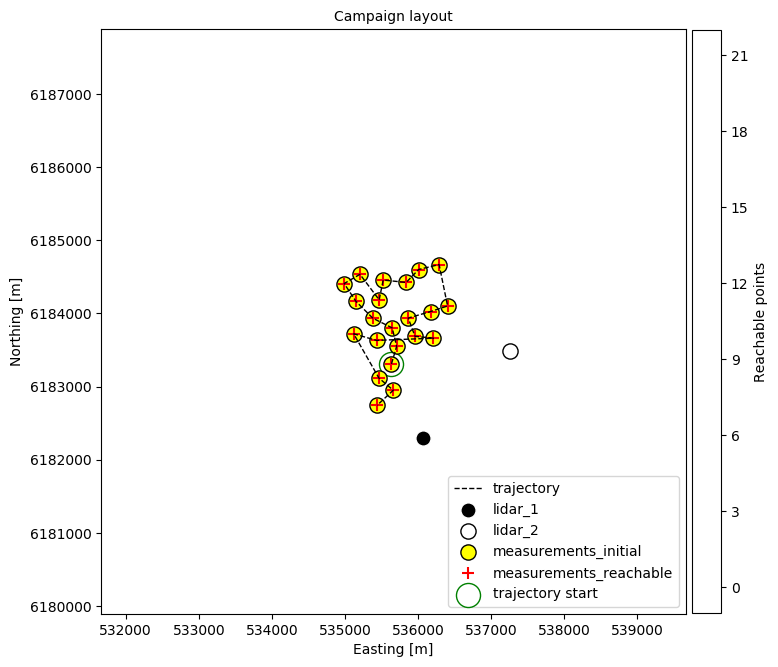

In [5]:
layout.optimize_trajectory()
layout.plot_layout(save_plot = True)

In [ ]:
np.asarray(layout.trajectory)

In [ ]:
travel_1 = []
travel_2 = []
for i in range(0,len(layout.measurements_initial)):

    layout.optimize_trajectory(i, False)
    _,_, displ_1 =  layout.trajectory2displacement(layout.lidar_pos_1, layout.trajectory)
    _,_, displ_2 =  layout.trajectory2displacement(layout.lidar_pos_2, layout.trajectory)
    max_travel_1 = np.max(np.sum(displ_1, axis = 0))
    max_travel_2 = np.max(np.sum(displ_2, axis = 0))
    travel_1 = travel_1 + [max_travel_1]
    travel_2 = travel_2 + [max_travel_2]
    
total_travel = np.asarray(travel_1) + np.asarray(travel_2)
min_traj_ind = np.where(total_travel == np.min(total_travel))
layout.optimize_trajectory(min_traj_ind[0][0], False)


In [ ]:
angles_1 =  layout.generate_beam_coords(layout.lidar_pos_1, layout.trajectory, 0)

In [ ]:
fig, ax = plt.subplots(sharey = True, figsize=(800/layout.MY_DPI, 800/layout.MY_DPI), dpi=layout.MY_DPI)
ax.plot(travel_1,color='black', linestyle='--',linewidth=1, label='lidar_1 total travel [deg]')
ax.plot(travel_2,color='red', linestyle='--',linewidth=1, label='lidar_2 total travel [deg]')
ax.plot(np.asarray(travel_1) + np.asarray(travel_2),color='green', linestyle='--',linewidth=1, label='lidar_2 total travel [deg]')

ax.legend(loc='lower right', fontsize = layout.FONT_SIZE)    

plt.xlabel('Easting [m]', fontsize = layout.FONT_SIZE)
plt.ylabel('Northing [m]', fontsize = layout.FONT_SIZE)


plt.title('Campaign layout', fontsize = layout.FONT_SIZE)

plt.show()


In [ ]:
for i in range(0,len(layout.trajectory) - 1):
    print(np.max(abs(layout.rollover(layout.trajectory[i], layout.trajectory[i+1],layout.lidar_pos_1))))
    print(np.max(abs(layout.rollover(layout.trajectory[i], layout.trajectory[i+1],layout.lidar_pos_2))))    

In [ ]:
angles_start = layout.generate_beam_coords(layout.lidar_pos_1, layout.trajectory, opt = 0)[:, (0,1)]

In [ ]:
angles_start = layout.generate_beam_coords(layout.lidar_pos_1, layout.trajectory, opt = 0)[:, (0,1)]

In [ ]:
angles_stop = layout.generate_beam_coords(layout.lidar_pos_1, np.roll(layout.trajectory, -1, axis = 0), opt = 0)[:, (0,1)]

In [ ]:
angles_start[:,0]

In [ ]:
angles_start[:,1]

In [ ]:
angles_start[:, 0]

In [ ]:
angles_stop[:, 0]

In [ ]:
angular_displacement = abs(angles_start - angles_stop)

In [ ]:
angular_displacement[:, 0]

In [ ]:
ind_1 = np.where((angular_displacement[:, 0] > 180) & (abs(360 - angular_displacement[:, 0]) <= 180))
ind_2 = np.where((angular_displacement[:, 0] > 180) & (abs(360 - angular_displacement[:, 0]) > 180))
ind_3 = np.where((abs(angular_displacement[:, 0]) <= 180))
angular_displacement[:, 0][ind_1] = 360 - angular_displacement[:, 0][ind_1]
angular_displacement[:, 0][ind_2] = 360 + angular_displacement[:, 0][ind_2]

In [ ]:
angular_displacement[:, 0]

In [ ]:
ind_1 = np.where((angular_displacement[:, 1] > 180) & (abs(360 - angular_displacement[:, 1]) <= 180))
ind_2 = np.where((angular_displacement[:, 1] > 180) & (abs(360 - angular_displacement[:, 1]) > 180))
ind_3 = np.where((abs(angular_displacement[:, 1]) <= 180))
angular_displacement[:, 1][ind_1] = 360 - angular_displacement[:, 1][ind_1]
angular_displacement[:, 1][ind_2] = 360 + angular_displacement[:, 1][ind_2]

In [ ]:
angular_displacement

In [ ]:
layout.trajectory2displacement(layout.lidar_pos_1, layout.trajectory)